# Data Analysis on "Walmart" Dataset

The database can be found from this link : https://www.kaggle.com/datasets/yasserh/walmart-dataset/data

* We will be using PACE (Plan, Analyze, Construct, Execute)

In [443]:
# For data manipulation
import numpy as np
import pandas as pd
import datetime as dt
import calendar
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Modeling
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [444]:
df = pd.read_csv('Walmart.csv')

In [445]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [447]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [448]:
df.shape

(6435, 8)

In [449]:
df.duplicated().sum()

0

In [450]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [451]:
df["Date"]=pd.to_datetime(df["Date"], format = "%d-%m-%Y")

In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


## Detecting outliers and deleting them using percentiles and iqr

0 Fuel_Price
1 Temperature
2 CPI
3 Unemployment
4 Weekly_Sales


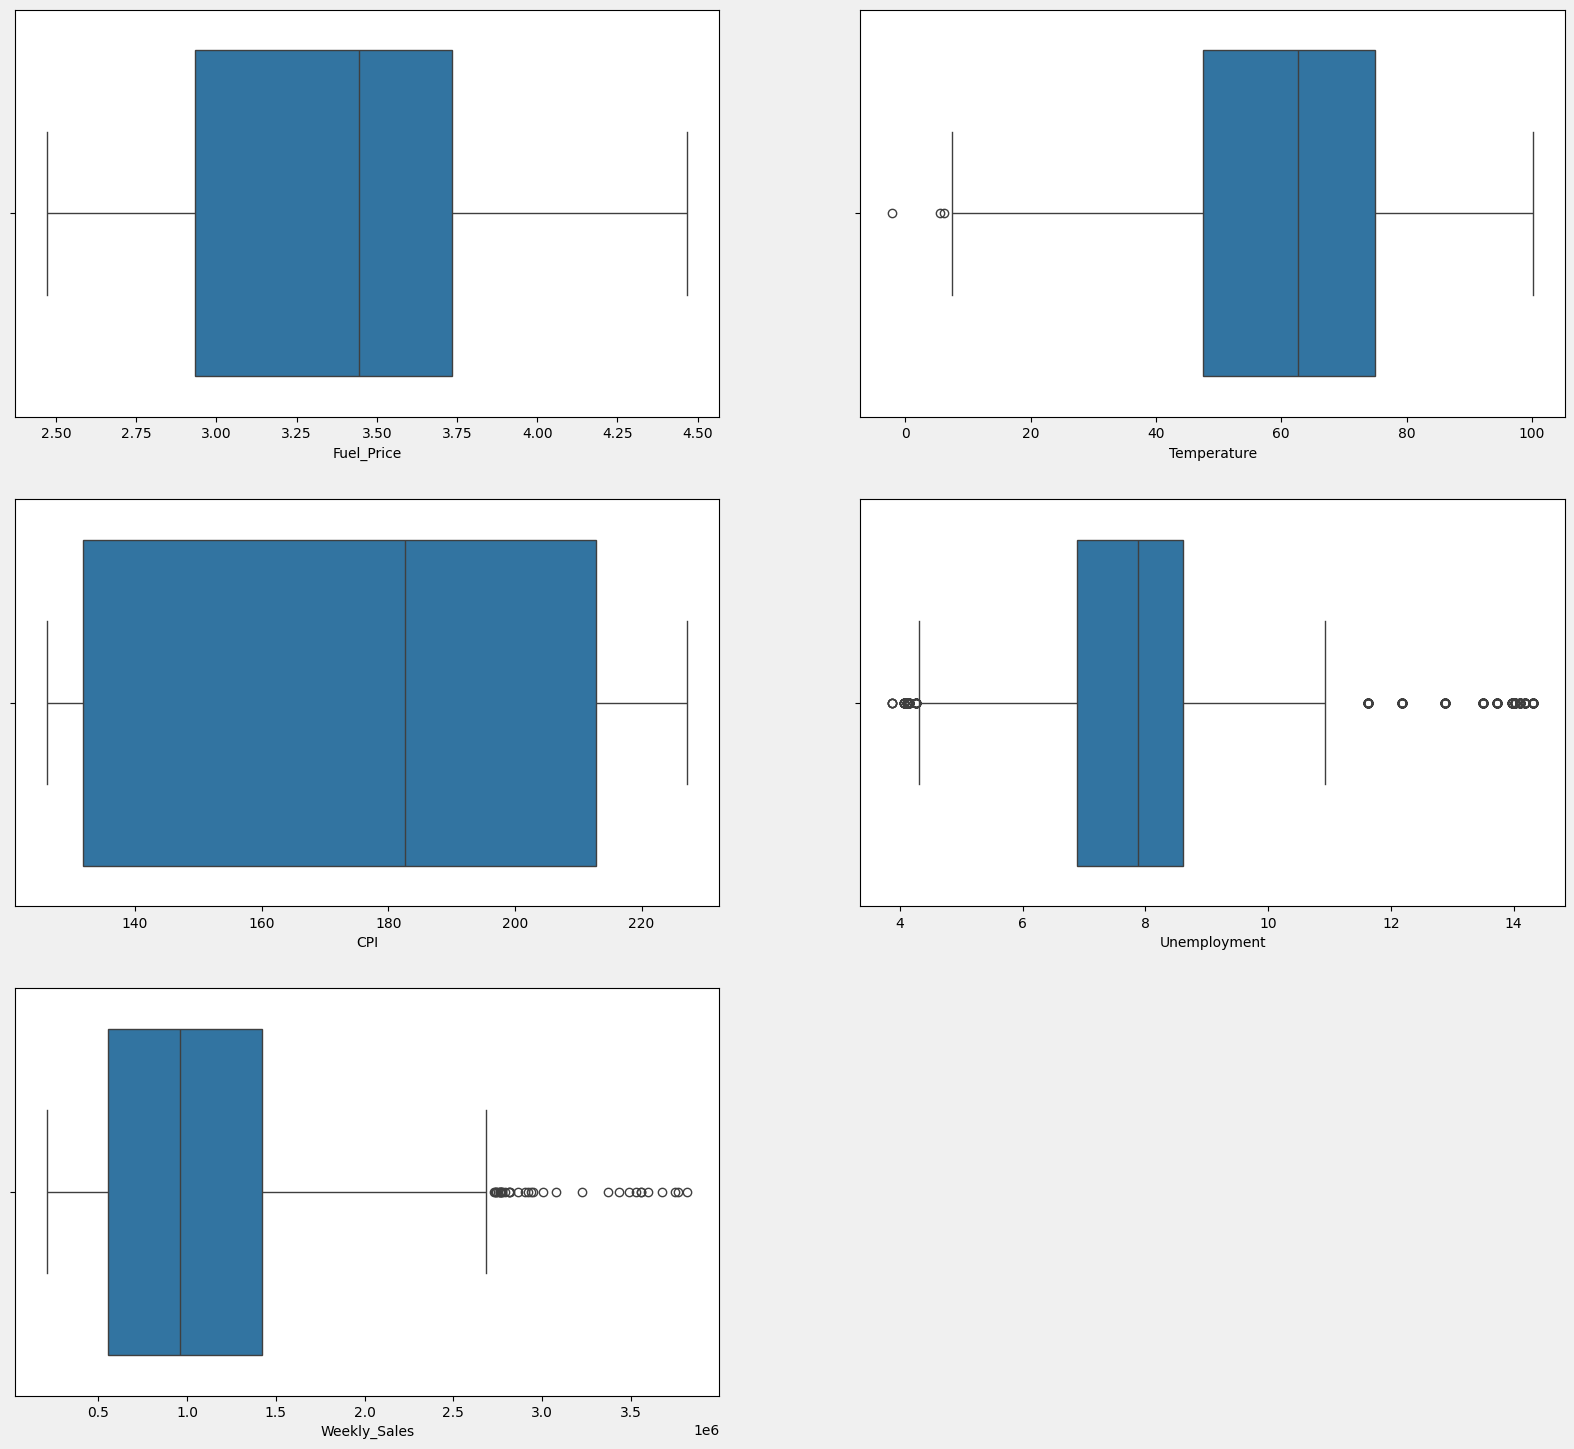

In [453]:
cols = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment', 'Weekly_Sales']
plt.figure(figsize=(20,18), facecolor='#f0f0f0')
for i,col in enumerate(cols):
    print(i, col)
    plt.subplot(3,2,i+1)
    sns.boxplot(df, x = col)
plt.show()

In [454]:
# using percentiles 25/75 we will discover the outliers withing our data
percentile25 = df['Weekly_Sales'].quantile(0.25)
percentile75 = df['Weekly_Sales'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('upper limit = ', str(upper_limit))
print('lower_limit = ', str(lower_limit))
print(iqr, percentile25, percentile75)

outliers = df[(df['Weekly_Sales'] > upper_limit) | (df['Weekly_Sales'] < lower_limit)]
print('number of rows containing outliers = ', len(outliers))

upper limit =  2720371.4924999997
lower_limit =  -746862.7275
866808.5549999999 553350.105 1420158.66
number of rows containing outliers =  34


In [455]:
df = df[(df['Weekly_Sales'] >= lower_limit) & (df['Weekly_Sales'] <= upper_limit)].reset_index(drop = True)

In [456]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6401.000000,6401,6.401000e+03,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000
mean,23.054210,2011-06-17 04:24:33.519762432,1.036130e+06,0.068895,60.772042,3.359634,171.642219,8.002298
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.517431e+05,0.000000,47.660000,2.933000,131.784000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.572983e+05,0.000000,62.860000,3.452000,182.658578,7.874000
75%,34.000000,2012-02-24 00:00:00,1.414565e+06,0.000000,75.000000,3.737000,212.833640,8.622000
max,45.000000,2012-10-26 00:00:00,2.685352e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.991284,NaN,5.451961e+05,0.253296,18.417068,0.459696,39.359852,1.878705


In [457]:
percentile25 = df['Unemployment'].quantile(0.25)
percentile75 = df['Unemployment'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('upper limit = ', str(upper_limit))
print('lower_limit = ', str(lower_limit))

outliers = df[(df['Unemployment'] > upper_limit) | (df['Unemployment'] < lower_limit)]
print('number of rows containing outliers = ', len(outliers))

upper limit =  11.218499999999999
lower_limit =  4.2945
number of rows containing outliers =  481


In [458]:
df = df[(df['Unemployment'] >= lower_limit) & (df['Unemployment'] <= upper_limit)].reset_index(drop = True)

In [459]:
percentile25 = df['Temperature'].quantile(0.25)
percentile75 = df['Temperature'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('upper limit = ', str(upper_limit))
print('lower_limit = ', str(lower_limit))

outliers = df[(df['Temperature'] > upper_limit) | (df['Temperature'] < lower_limit)]
print('number of rows containing outliers = ', len(outliers))

upper limit =  116.35874999999999
lower_limit =  5.328750000000014
number of rows containing outliers =  1


In [460]:
df = df[(df['Temperature'] >= lower_limit) & (df['Temperature'] <= upper_limit)].reset_index(drop = True)

## Extracting valuables informations from Date

In [461]:
def season(quarter):
    if quarter == 1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    else:
        return 'Autumn'

In [462]:
# Creating year column
df['year'] = df['Date'].dt.year

# Creating month column
df['month'] = df['Date'].dt.month_name()

# Creating quarter column
df['quarter'] = df['Date'].dt.quarter

# Creating season column
df['season'] = df['quarter'].apply(season)

# Creating week number of month
df['week'] = ((df['Date'].dt.day - 1) // 7 % 4) + 1

#Creating day column
df['day'] = df['Date'].dt.day_name()

In [463]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,quarter,season,week,day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,February,1,Winter,1,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,February,1,Winter,2,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,February,1,Winter,3,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,February,1,Winter,4,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,March,1,Winter,1,Friday


In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5919 entries, 0 to 5918
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         5919 non-null   int64         
 1   Date          5919 non-null   datetime64[ns]
 2   Weekly_Sales  5919 non-null   float64       
 3   Holiday_Flag  5919 non-null   int64         
 4   Temperature   5919 non-null   float64       
 5   Fuel_Price    5919 non-null   float64       
 6   CPI           5919 non-null   float64       
 7   Unemployment  5919 non-null   float64       
 8   year          5919 non-null   int32         
 9   month         5919 non-null   object        
 10  quarter       5919 non-null   int32         
 11  season        5919 non-null   object        
 12  week          5919 non-null   int32         
 13  day           5919 non-null   object        
dtypes: datetime64[ns](1), float64(5), int32(3), int64(2), object(3)
memory usage: 578.2+ KB


0 Fuel_Price
1 Temperature
2 Weekly_Sales
3 Unemployment
4 CPI


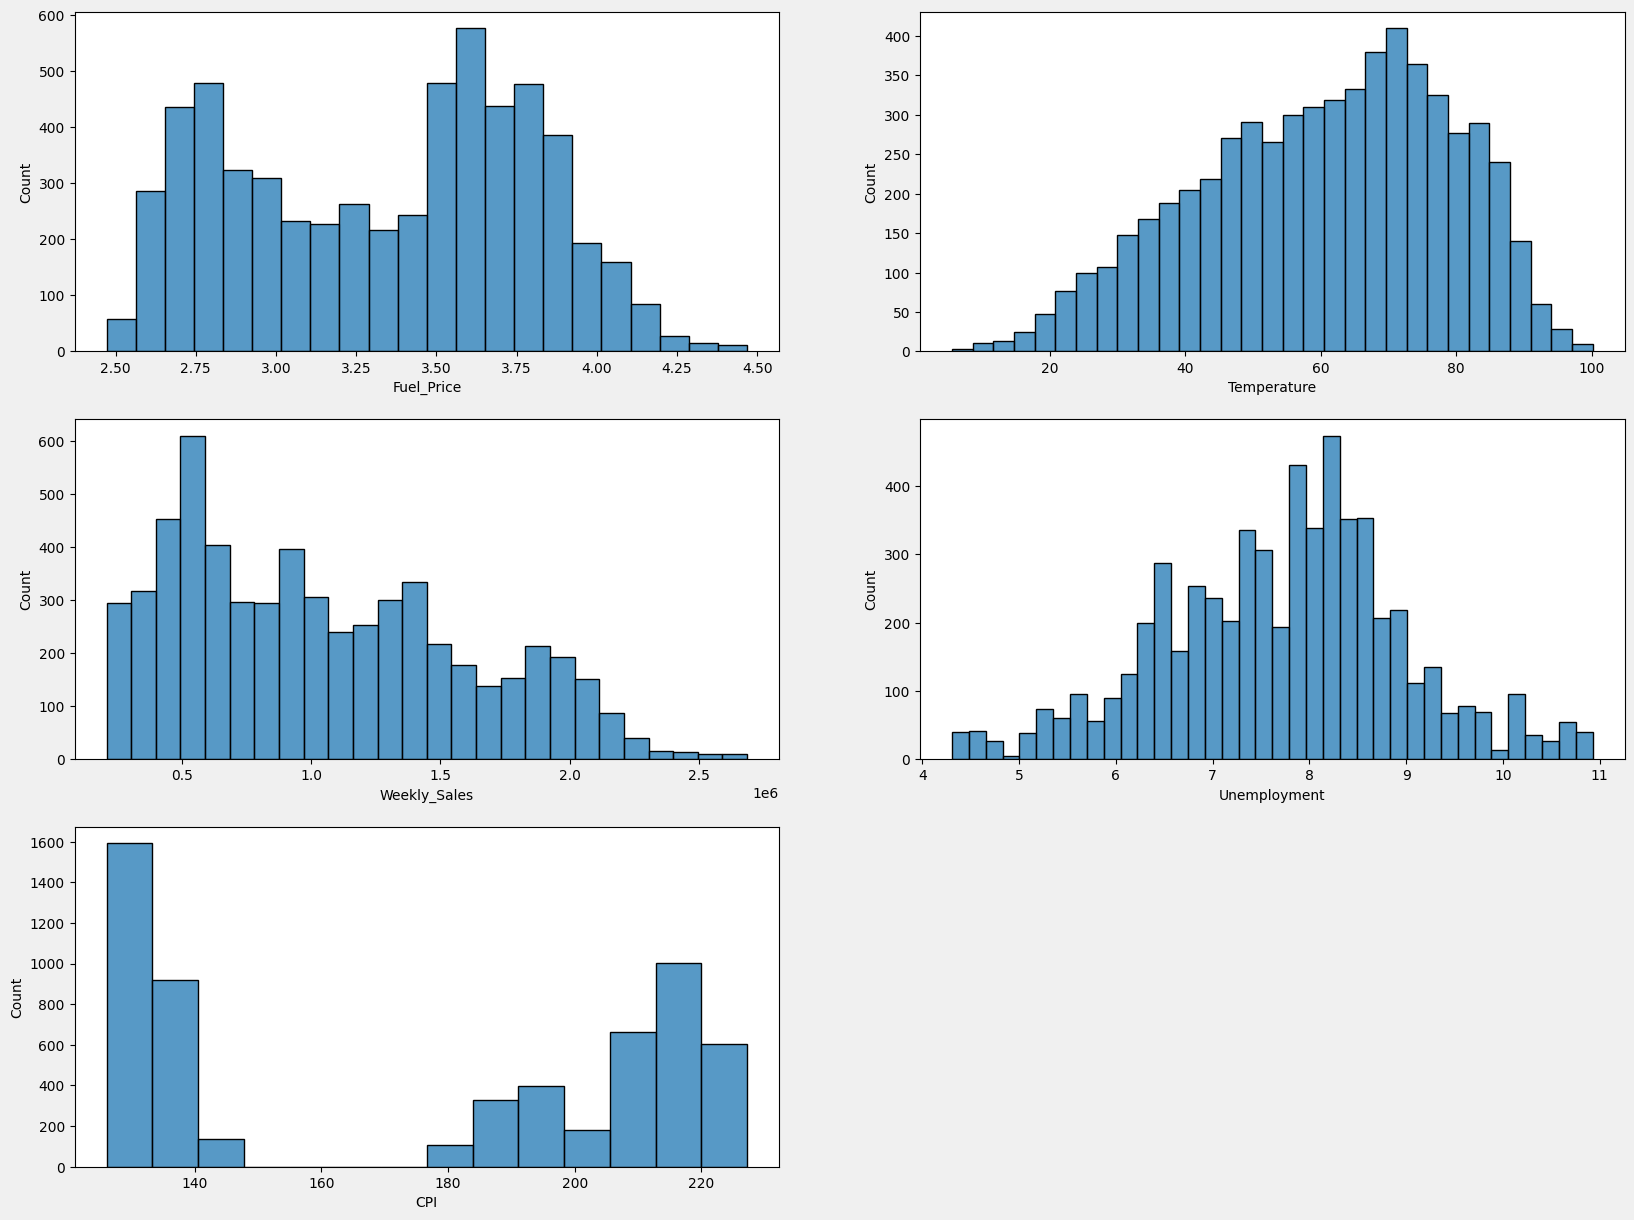

In [465]:
cols = ['Fuel_Price', 'Temperature', 'Weekly_Sales', 'Unemployment', 'CPI']
plt.figure(figsize=(20,15), facecolor='#f0f0f0')
for i,col in enumerate(cols):
    print(i, col)
    plt.subplot(3,2,i+1)
    sns.histplot(df, x = col)
plt.show()

- Weekly sales got skewed distribution
- Unemployment and temperature got normal distribution
- Fuel Price and CPI got bimodal distribution

<AxesSubplot: xlabel='Unemployment', ylabel='Weekly_Sales'>

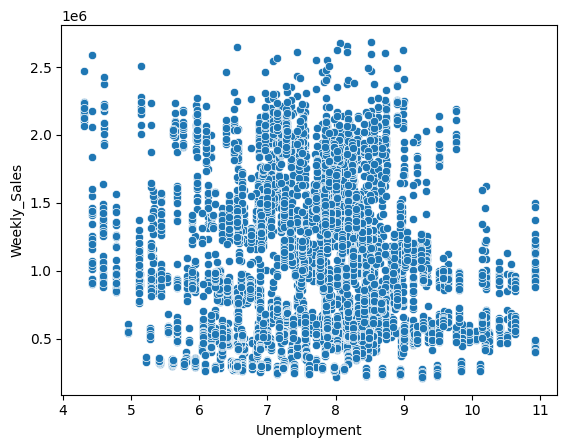

In [530]:
sns.scatterplot(x = df['Unemployment'], y = df['Weekly_Sales'])

When Unemployment is raising, Weekly sales are getting less

In [466]:
df['Holiday_Flag'].value_counts(normalize = True)

Holiday_Flag
0    0.9309
1    0.0691
Name: proportion, dtype: float64

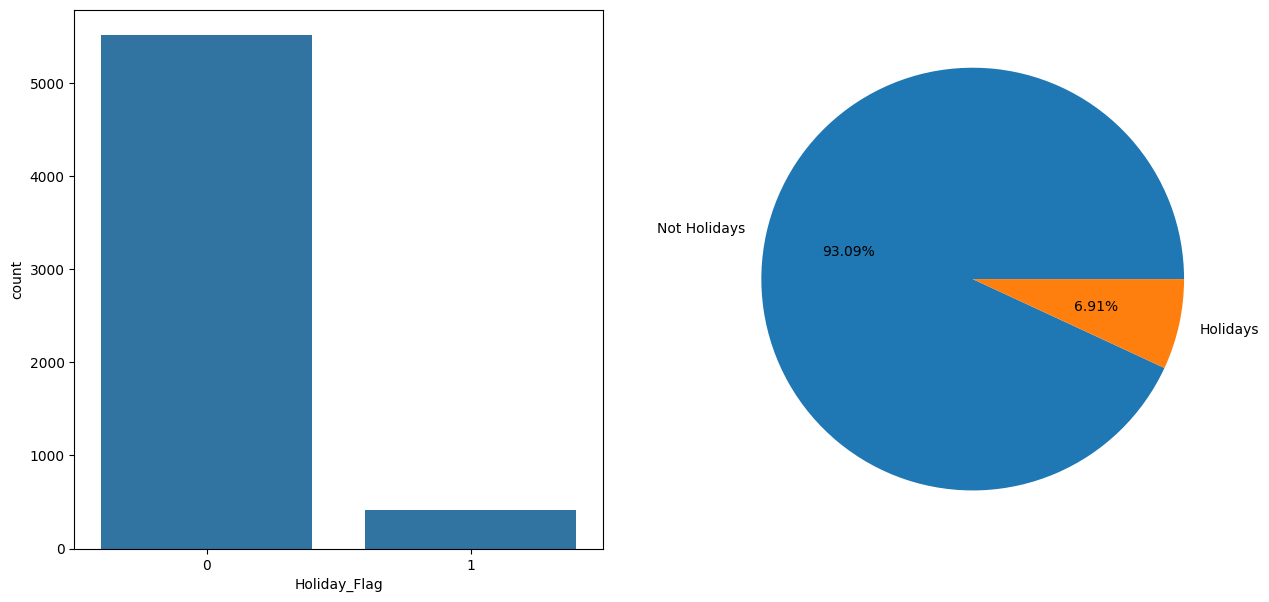

In [467]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.countplot(x = df['Holiday_Flag'], ax = ax[0])

ax[1].pie(df['Holiday_Flag'].value_counts().values, labels = ['Not Holidays', 'Holidays'], autopct = '%1.2f%%')

plt.show()

In [468]:
df['year'].value_counts(normalize=True)

year
2011    0.366447
2010    0.337219
2012    0.296334
Name: proportion, dtype: float64

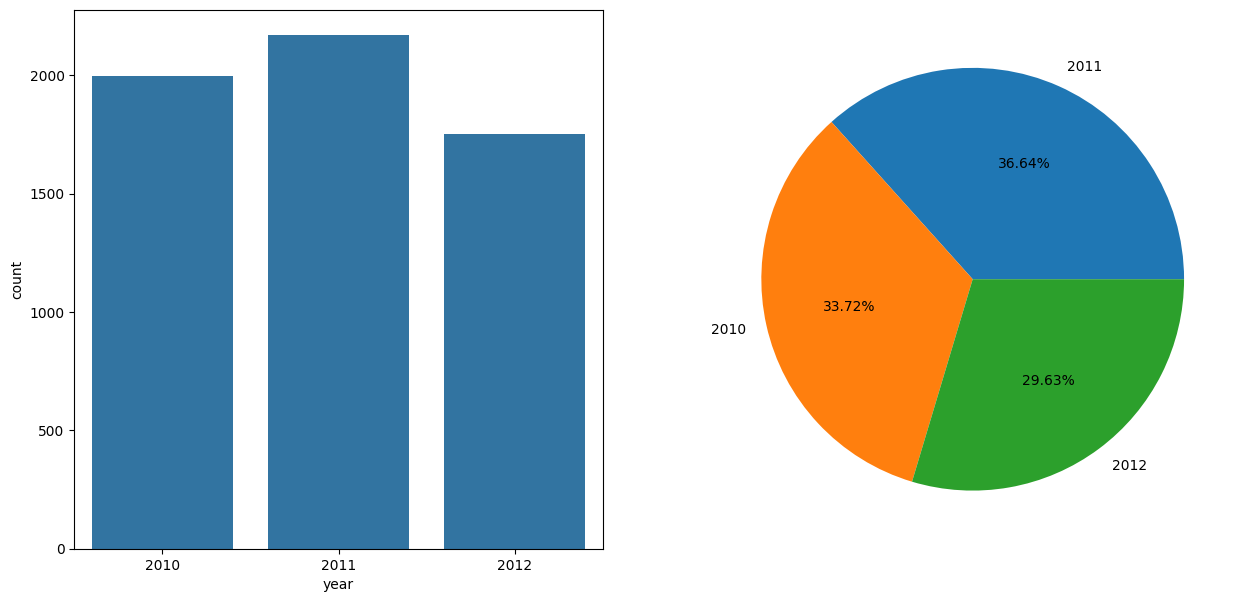

In [469]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.countplot(x = df['year'], ax = ax[0])

ax[1].pie(df['year'].value_counts().values, labels = ['2011', '2010', '2012'], autopct = '%1.2f%%')

plt.show()

In [470]:
df['month'].value_counts(normalize=True)

month
July         0.099341
April        0.097990
August       0.092245
September    0.092245
October      0.092245
March        0.090556
June         0.090556
May          0.083798
February     0.083629
December     0.066734
January      0.055415
November     0.055246
Name: proportion, dtype: float64

In [471]:
df['month'].unique()

array(['February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'January'],
      dtype=object)

C:\Users\SPLENDID\AppData\Local\Temp\ipykernel_7012\1651720319.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')


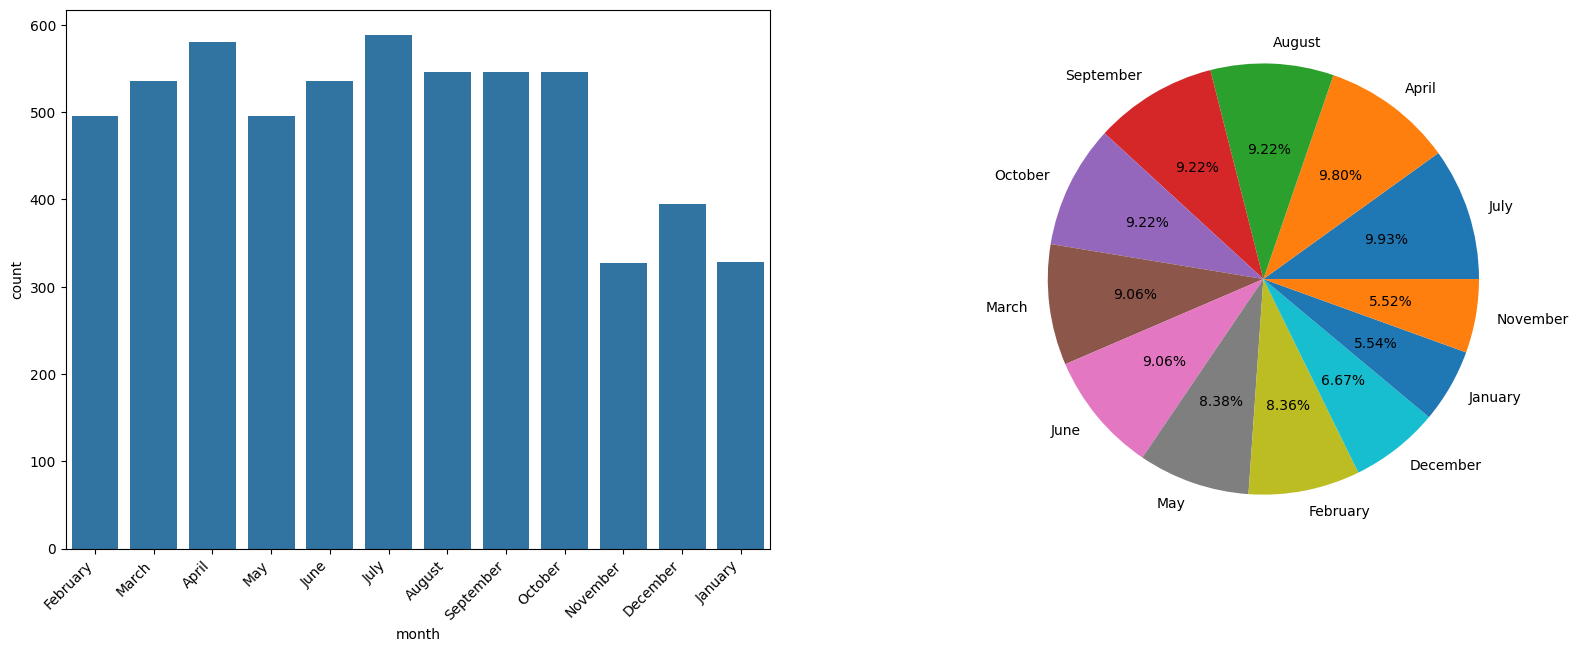

In [472]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
sns.countplot(x = df['month'], ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

ax[1].pie(df['month'].value_counts().values, labels = ['July', 'April', 'August', 'September', 'October', 'March', 'June', 'May', 'February', 'December', 'January', 'November'], autopct = '%1.2f%%')

plt.show()

In [473]:
df['season'].value_counts(normalize=True)

season
Summer    0.283832
Spring    0.272343
Winter    0.229600
Autumn    0.214225
Name: proportion, dtype: float64

C:\Users\SPLENDID\AppData\Local\Temp\ipykernel_7012\1797594928.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')


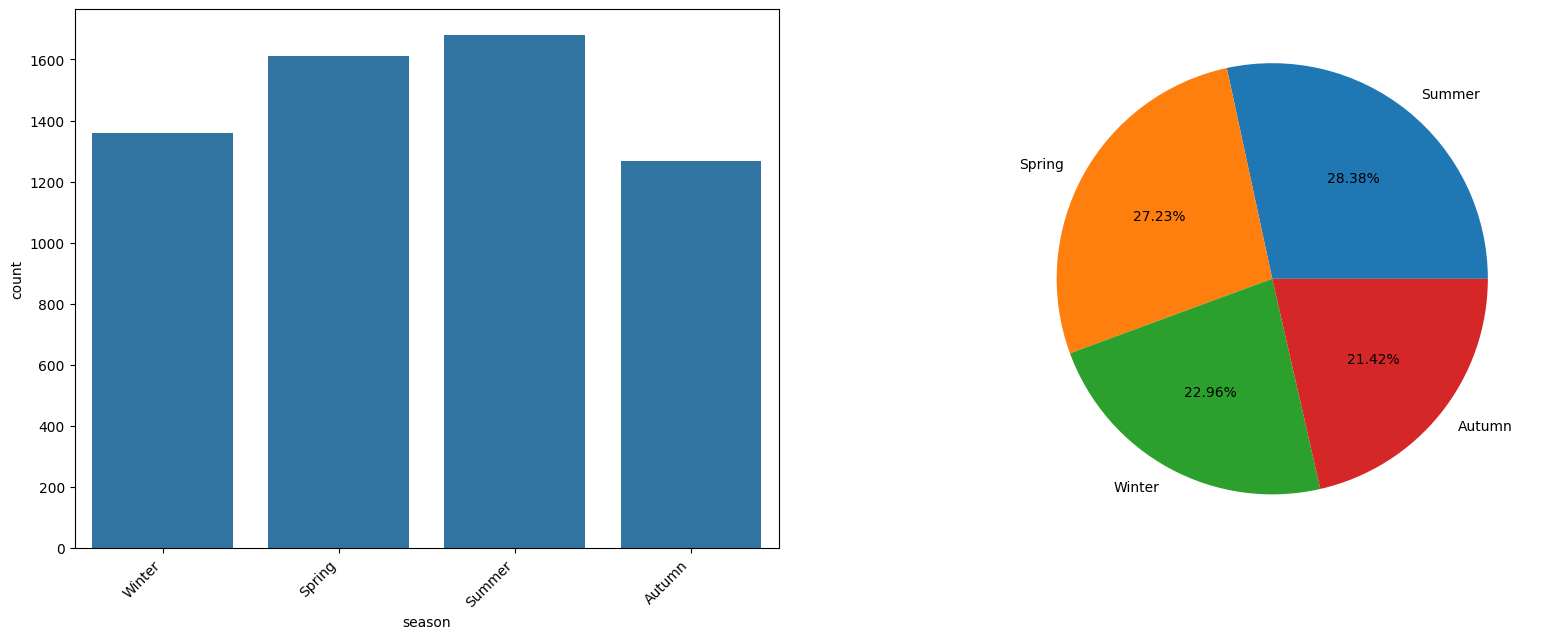

In [474]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
sns.countplot(x = df['season'], ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

ax[1].pie(df['season'].value_counts().values, labels = ['Summer', 'Spring', 'Winter', 'Autumn'], autopct = '%1.2f%%')

plt.show()

In [475]:
pd.pivot_table(data = df,
               index = 'year',
               columns = 'season',
               values = 'Weekly_Sales',
               aggfunc = 'sum')

season,Autumn,Spring,Summer,Winter
year,,,,
2010,6.081470e+08,5.759128e+08,5.643656e+08,3.494040e+08
2011,5.990732e+08,5.634461e+08,6.032263e+08,4.965888e+08
2012,1.662927e+08,5.515739e+08,5.456943e+08,5.277911e+08


In [476]:
pd.pivot_table(data = df,
               index = 'year',
               columns = 'month',
               values = 'Weekly_Sales',
               aggfunc = 'sum')

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2010,2.182086e+08,1.772900e+08,2.262664e+08,1.783441e+08,NaN,2.199126e+08,1.814865e+08,1.710599e+08,1.762177e+08,1.769412e+08,2.049394e+08,1.671630e+08
2011,2.131651e+08,1.780078e+08,2.405462e+08,1.741784e+08,1.541568e+08,2.171255e+08,1.791118e+08,1.682535e+08,1.711692e+08,1.859295e+08,1.725975e+08,2.080930e+08
2012,1.685752e+08,2.133716e+08,NaN,1.706385e+08,1.510462e+08,1.692403e+08,2.145698e+08,2.061064e+08,1.684290e+08,NaN,1.662927e+08,1.630823e+08


In [477]:
year_order = ['2010', '2011', '2012']

C:\Users\SPLENDID\AppData\Local\Temp\ipykernel_7012\688198349.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = df['year'], y = df['Weekly_Sales'], hue = df['month'], estimator = np.sum, order = year_order, ci = False)


Text(0.5, 1.0, 'Total Sales per month for each year')

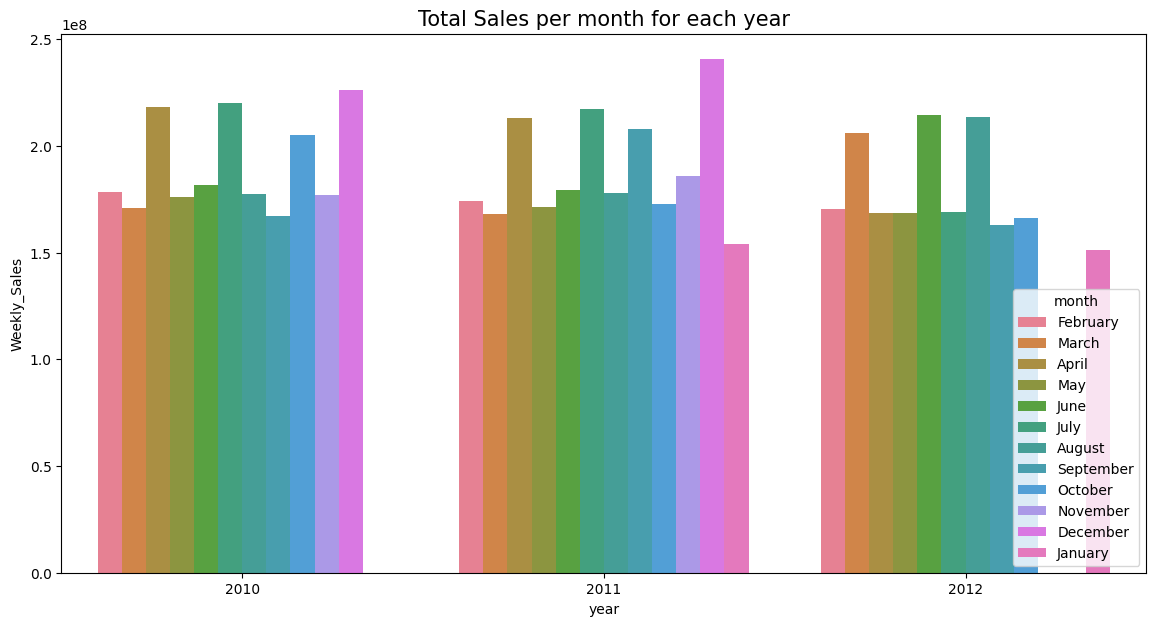

In [478]:
plt.figure(figsize = (14, 7))
sns.barplot(x = df['year'], y = df['Weekly_Sales'], hue = df['month'], estimator = np.sum, order = year_order, ci = False)
plt.title('Total Sales per month for each year', size = 15)

C:\Users\SPLENDID\AppData\Local\Temp\ipykernel_7012\4123084599.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = df['year'], y = df['Weekly_Sales'], hue = df['season'], estimator = np.sum, order = year_order, ci = False)


Text(0.5, 1.0, 'Total Sales per month for each year')

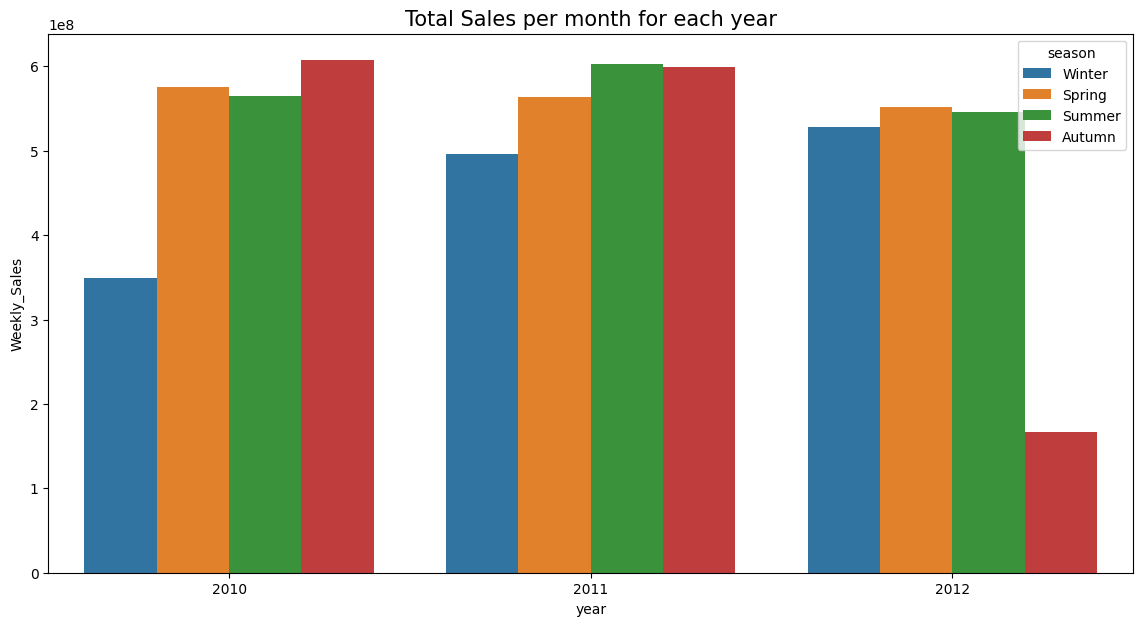

In [479]:
plt.figure(figsize = (14, 7))
sns.barplot(x = df['year'], y = df['Weekly_Sales'], hue = df['season'], estimator = np.sum, order = year_order, ci = False)
plt.title('Total Sales per month for each year', size = 15)

Winter in 2010 was low in the weekly sales, also Autumn in 2012

In [480]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
total_sales_month = df.groupby('month')['Weekly_Sales'].sum().reindex(index=month_order)
total_sales_month

month
January      3.052030e+08
February     5.231610e+08
March        5.454199e+08
April        5.999488e+08
May          5.158159e+08
June         5.751681e+08
July         6.062784e+08
August       5.686695e+08
September    5.383383e+08
October      5.438296e+08
November     3.628707e+08
December     4.668126e+08
Name: Weekly_Sales, dtype: float64

C:\Users\SPLENDID\AppData\Local\Temp\ipykernel_7012\2246901136.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = total_sales_month.index, y = total_sales_month, ci = False)


Text(0.5, 1.0, 'Total Sales per month')

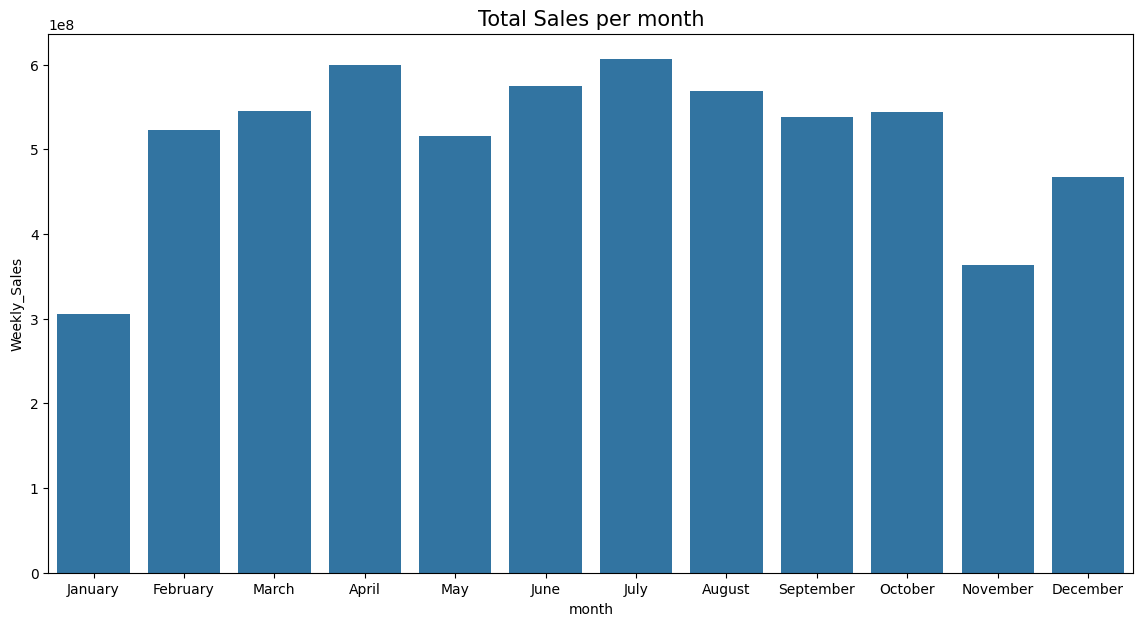

In [481]:
plt.figure(figsize = (14, 7))
sns.barplot(x = total_sales_month.index, y = total_sales_month, ci = False)
plt.title('Total Sales per month', size = 15)

- Lowest month in sales is January and November

In [482]:
week_order = [1,2,3,4]
total_sales_week = df.groupby('week')['Weekly_Sales'].sum().reindex(index=week_order)
total_sales_week

week
1    1.905485e+09
2    1.435643e+09
3    1.409745e+09
4    1.400642e+09
Name: Weekly_Sales, dtype: float64

C:\Users\SPLENDID\AppData\Local\Temp\ipykernel_7012\3311940781.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = total_sales_week.index, y = total_sales_week, ci=False)


Text(0.5, 1.0, 'Total Sales per week (1-4 of every month)')

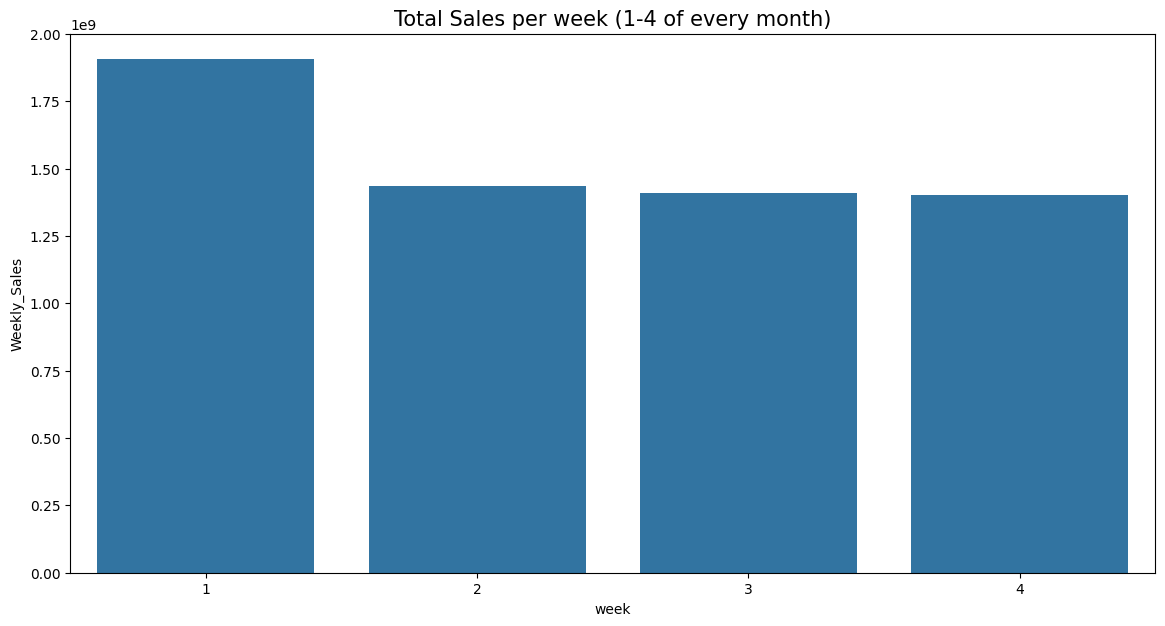

In [483]:
plt.figure(figsize = (14, 7))
sns.barplot(x = total_sales_week.index, y = total_sales_week, ci=False)
plt.title('Total Sales per week (1-4 of every month)', size = 15)

- We can see that the week 1 of every month got higher weekly sales than others that are pretty much the same

C:\Users\SPLENDID\AppData\Local\Temp\ipykernel_7012\4173835956.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = df['year'], y = df['Weekly_Sales'], hue = df['day'], estimator = np.sum, order = year_order, ci = False)


Text(0.5, 1.0, 'Total Sales per day for each year')

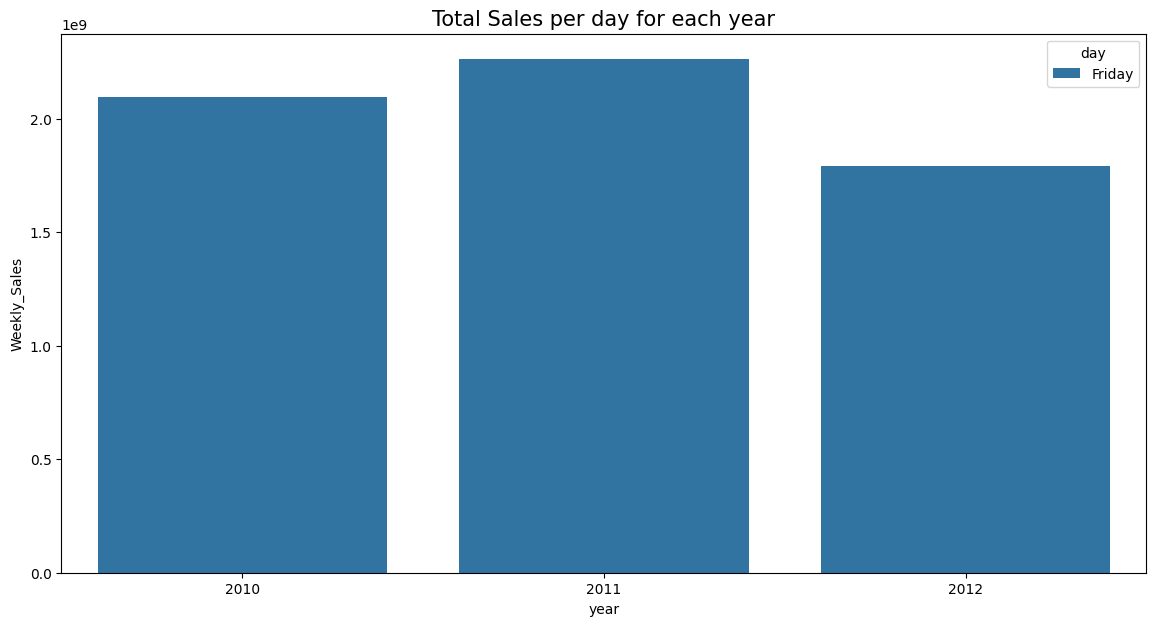

In [484]:
plt.figure(figsize = (14, 7))
sns.barplot(x = df['year'], y = df['Weekly_Sales'], hue = df['day'], estimator = np.sum, order = year_order, ci = False)
plt.title('Total Sales per day for each year', size = 15)

Text(0.5, 1.0, 'Fuel price over months with yearly comparison')

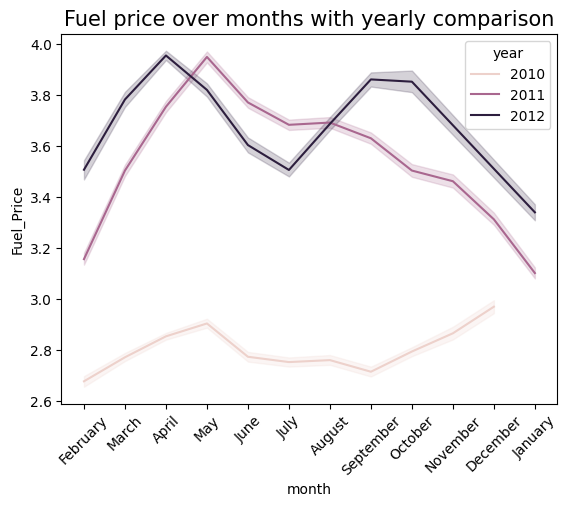

In [485]:
sns.lineplot(x = df['month'], y = df['Fuel_Price'], hue=df['year'])
plt.xticks(rotation = 45)
plt.title('Fuel price over months with yearly comparison', size = 15)

As indicated in the lineplot, fuel price was low back in 2010, but now got high in 2011 and 2012

Text(0.5, 1.0, 'Unemployment Over Months with Yearly Comparison')

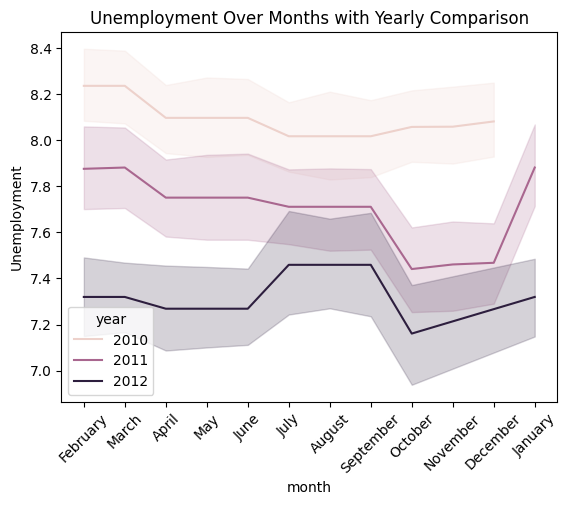

In [486]:
sns.lineplot(x=df['month'], y=df['Unemployment'], hue=df['year'])
plt.xticks(rotation=45)
plt.title('Unemployment Over Months with Yearly Comparison')

- In the year 2012 we see that it has the lowest Unemployment rates and in between december/january 2011 the rate has gone up as illustrated in the plot we maybe need to review the policy or what happened

# We will see if we can apply Linear Regression on this dataset

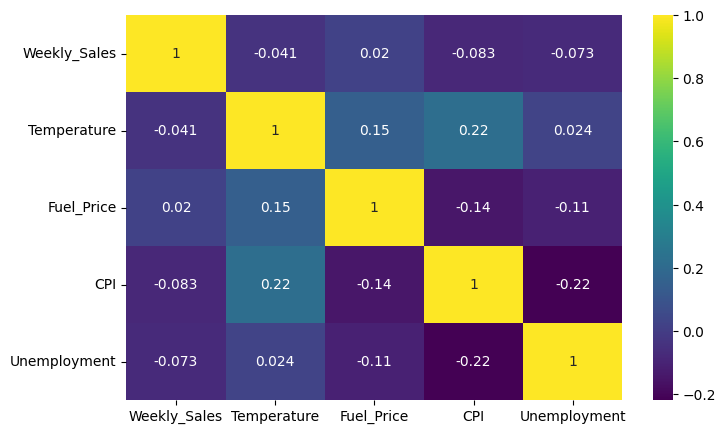

In [487]:
plt.figure(figsize = (8, 5))
sns.heatmap(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr(), annot = True, cmap='viridis')
plt.show()

No correlations between the attributs

In [488]:
selected_columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales']

In [489]:
df[selected_columns].describe()

,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
count,5919.000000,5919.000000,5919.000000,5919.000000,5.919000e+03
mean,60.414976,3.340450,175.007985,7.722191,1.039283e+06
std,18.410670,0.458161,39.025300,1.243179,5.518596e+05
min,5.540000,2.472000,126.064000,4.308000,2.099862e+05
25%,46.970000,2.891000,132.765211,6.891000,5.526034e+05
50%,62.610000,3.420000,190.006988,7.852000,9.472292e+05
75%,74.725000,3.721000,213.795407,8.494000,1.427504e+06
max,100.140000,4.468000,227.232807,10.926000,2.685352e+06


- p-value is < 0.001: we say there is strong evidence that the correlation is significant. p-value is < 0.05: there is moderate evidence that the correlation is significant. p-value is < 0.1: there is weak evidence that the correlation is significant. p-value is > 0.1: there is no evidence that the correlation is significant.

Fuel price x Weekly Sales

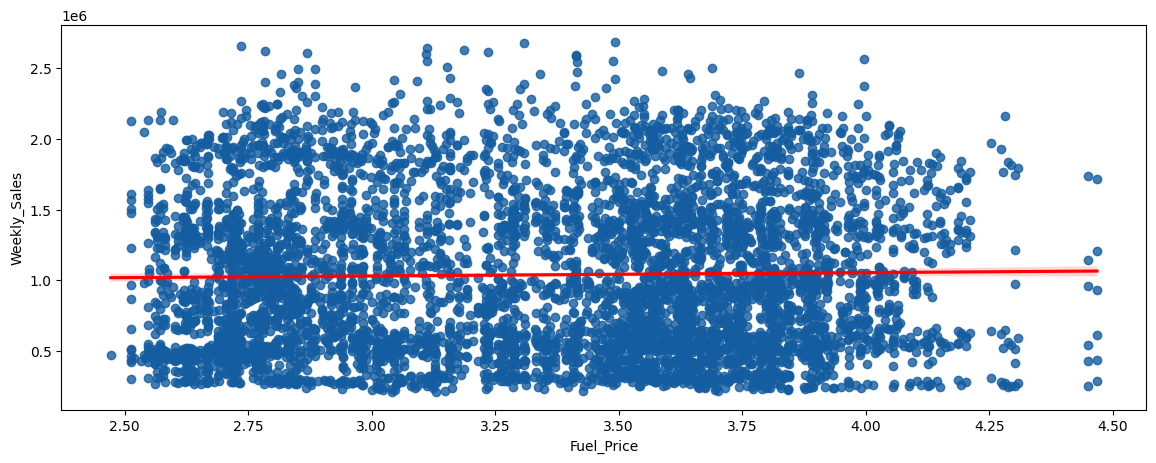

In [490]:
plt.figure(figsize = (14, 5))
sns.regplot(data = df, x = 'Fuel_Price', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

In [491]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Fuel_Price'], df['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.019663380678184128  with a P-value of P = 0.1303737579223401


There is no evidence of correlation because p-value > 0.1

Temperature x Weekly sales

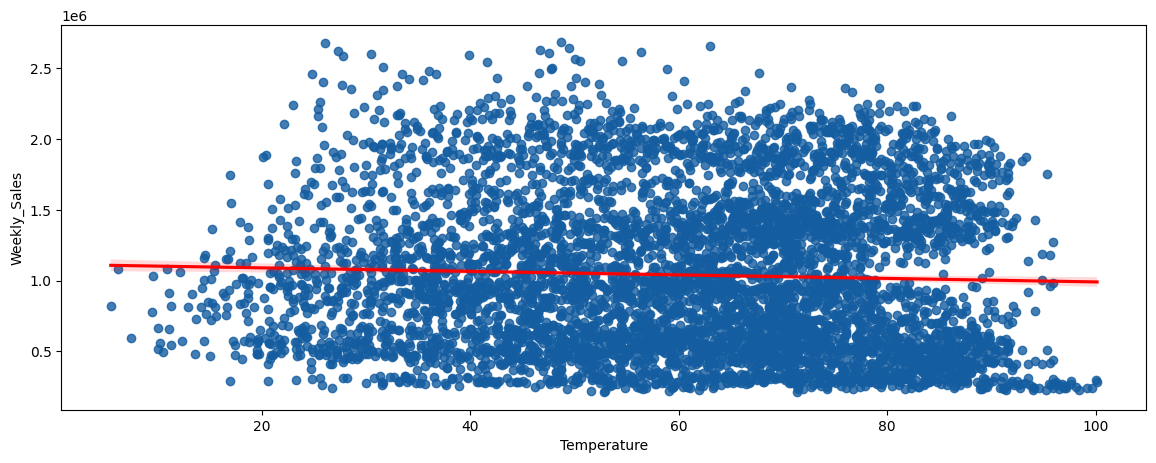

In [492]:
plt.figure(figsize = (14, 5))
sns.regplot(data = df, x = 'Temperature', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

In [493]:
pearson_coef, p_value = stats.pearsonr(df['Temperature'], df['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.04146056949039003  with a P-value of P = 0.001420422903908408


There is moderate evidence of correlation between Temperature and Weekly Sales

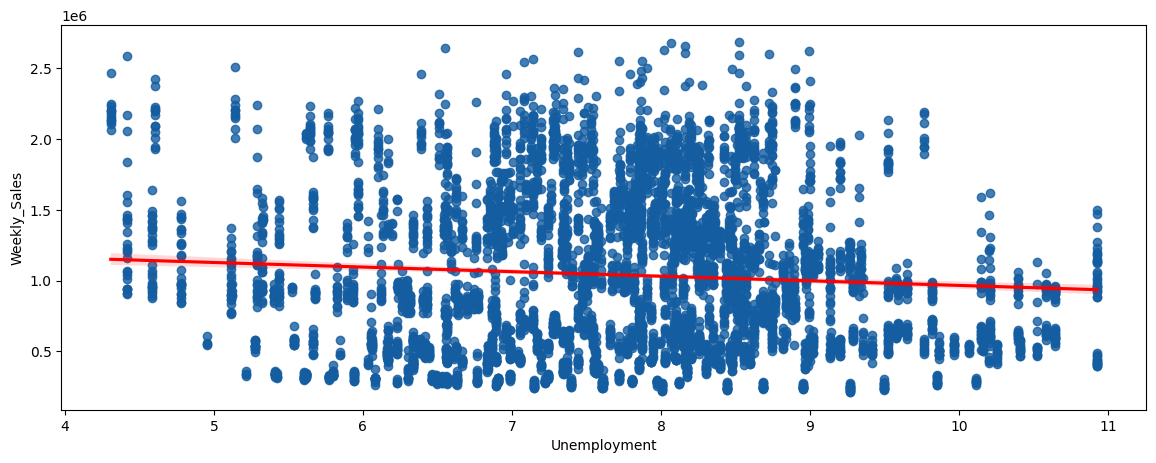

In [494]:
plt.figure(figsize = (14, 5))
sns.regplot(data = df, x = 'Unemployment', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

In [495]:
pearson_coef, p_value = stats.pearsonr(df['Unemployment'], df['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.07310687078889232  with a P-value of P = 1.7934708850014918e-08


The p-value is high so there is no evidence about correlation between Unployment and Weekly sales